### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
#magic line to use tensorflow2.x
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

2.1.0


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
from tensorflow.keras import datasets

In [0]:

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

#### Change train and test labels into one-hot vectors

In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10,dtype='float64')

y_test = to_categorical(y_test, num_classes=10, dtype='float64')

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
# Normalizing the pixels

X_train = X_train/255
X_test = X_test/255

In [0]:
# reshaping the data as 28 x 28 x 1
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [0]:
#Clear any previous model from memory
import tensorflow
tensorflow.keras.backend.clear_session()

In [0]:
from tensorflow.keras import models, layers

model = models.Sequential()

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history =  model.fit(X_train,y_train, epochs=50, validation_data=(X_test, y_test), batch_size=1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.7018 - accuracy: 0.7613 - val_loss: 0.9161 - val_accuracy: 0.7526
Epoch 2/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4222 - accuracy: 0.8513 - val_loss: 0.6045 - val_accuracy: 0.8262
Epoch 3/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3648 - accuracy: 0.8701 - val_loss: 0.4704 - val_accuracy: 0.8540
Epoch 4/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3341 - accuracy: 0.8790 - val_loss: 0.4084 - val_accuracy: 0.8638
Epoch 5/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3154 - accuracy: 0.8859 - val_loss: 0.3836 - val_accuracy: 0.8694
Epoch 6/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2945 - accuracy: 0.8935 - val_loss: 0.3607 - val_accuracy: 0.8662
Epoch 7/50
60000/60000 [==============================] 

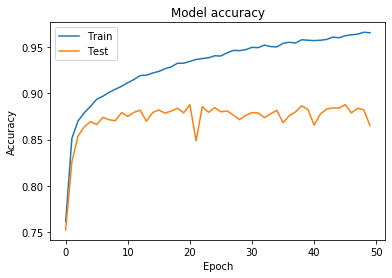

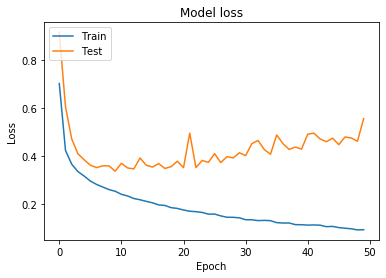

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1.   From the training we can see that the model is overfitting with a training accuracy of 96%, however the validation accuracy is at 86%.
2.   From the above, we understand that the model is not actually generalization to the real time data.
3.   Also, the model trained is only capable of predicting a new data when the data show is as similar as the data in the training set, eg. the view angle, the image width, the image shift, flip, etc
4. To generalize the model we need to train the model with more data of the same images in different orientations/view angle/flip/width and many more. 


In [16]:
score = model.evaluate(X_test, y_test)

print('Evaluation on Test set before ImageDataGeneration:\n')
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

10000/10000 [==============================] - 0s 49us/sample - loss: 0.5551 - accuracy: 0.8651
Evaluation on Test set before ImageDataGeneration:

Loss: 0.5551
Accuracy: 0.8651


In [0]:
# trying ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen1 = ImageDataGenerator(
        rotation_range = 15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=False,
        horizontal_flip=True) 

1.  ImageDataGenerator is a function that can manipulate the data on differert fronts.
2. We manipulate the existing minst-fashion dataset, and change the orientaion, flip and other aspects of the image.
3. Using that manipulated images we train the model again to check if the model is generalizating to the new data in production.

In [0]:
datagen1.fit(X_train)

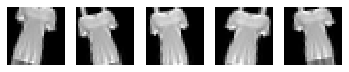

In [30]:
from matplotlib import pyplot as plt
gen = datagen1.flow(X_train[10:11], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [31]:
history = model.fit_generator(datagen1.flow(X_train, y_train, batch_size = 128), epochs = 40, 
                              validation_data = (X_test, y_test), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // 128)

  ...
    to  
  ['...']
Train for 468 steps, validate on 10000 samples
Epoch 1/40
468/468 - 15s - loss: 0.6097 - accuracy: 0.7771 - val_loss: 0.4444 - val_accuracy: 0.8400
Epoch 2/40
468/468 - 15s - loss: 0.5527 - accuracy: 0.7928 - val_loss: 0.4520 - val_accuracy: 0.8317
Epoch 3/40
468/468 - 15s - loss: 0.5399 - accuracy: 0.7982 - val_loss: 0.4433 - val_accuracy: 0.8313
Epoch 4/40
468/468 - 15s - loss: 0.5278 - accuracy: 0.8007 - val_loss: 0.4355 - val_accuracy: 0.8420
Epoch 5/40
468/468 - 15s - loss: 0.5156 - accuracy: 0.8071 - val_loss: 0.4249 - val_accuracy: 0.8420
Epoch 6/40
468/468 - 15s - loss: 0.5106 - accuracy: 0.8087 - val_loss: 0.4236 - val_accuracy: 0.8438
Epoch 7/40
468/468 - 15s - loss: 0.5065 - accuracy: 0.8082 - val_loss: 0.4445 - val_accuracy: 0.8322
Epoch 8/40
468/468 - 15s - loss: 0.5028 - accuracy: 0.8129 - val_loss: 0.4089 - val_accuracy: 0.8480
Epoch 9/40
468/468 - 15s - loss: 0.4994 - accuracy: 0.8133 - val_loss: 0.4153 - val_accuracy: 0.8424
Epoch 10/40
468/468

1.   Once the data is manipulated with ImageDataGenerator, we fit it on top of the existing trained model to generalize it to the production data
2.   The model yields satisfing results of giving a validation accuracy of 86%.



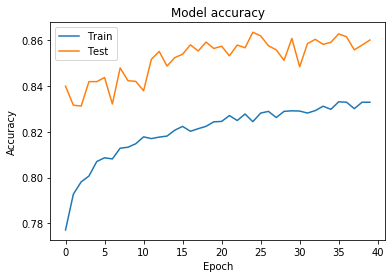

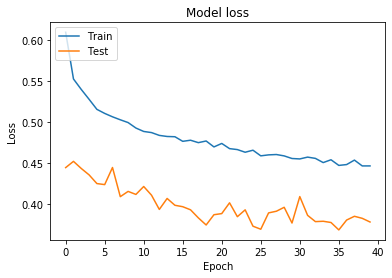

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3779 - accuracy: 0.8602
Loss: 0.3779
Accuracy: 0.8602


Summary

---


1.   We read the data from inbuilt dataset in keras.
2.   We converted the target data into numerical categories.
3.   We starndardized the pixels of the feature variables.
4.   We build the ANN with two dense layer of 200 and 100 neurons. Add a BatchNormalization inbetween.
5.   The model is overfitting since the accuracy with the training data is more than the validation accuracy.
6.   We have to generalize the model so that it can predict right even when the images are changed interms of orientation, view point and flips.
7.   We create a ImageDataGenerator object and fit the training data.
8.   On top of the model we created we fit the manipulated images so that we generalize the model to predict better in the production.
9.   In the generalized model we have a Test Accuracy of 86%, where as the training accuracy was just 83%.

